<a href="https://colab.research.google.com/github/nitin7478/Capstone_EDA_project_Almabetter/blob/main/Applied_Statistics_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Customer Purchase Behavior Analysis using Descriptive Statistics

##Problem Statement

🔍 **Problem Statement**:

Welcome to the Probability and Statistics project! 📊🔍 In this exciting journey, you'll get the chance to apply the concepts you've learned in probability theory and statistics to analyze a real-world dataset. This project is your opportunity to dive deep into the world of data analysis and gain practical experience with the tools and techniques you've been learning. 🚀

🎯 **Objective**:

Your mission is to analyze the provided dataset containing customer information and purchasing behavior to make informed decisions. Your goal is to identify patterns, trends, and correlations that will help your company optimize its marketing efforts and increase offer acceptance rates. 🎉

##About the Dataset



Here's the link to the [dataset](https://docs.google.com/spreadsheets/d/12ln9iTNcVNOMYi_AU-OczKpa_KIP8XyVbsjk81Na8Yk/edit?usp=sharing)


This data was gathered during last year's campaign.
Data description is as follows;

1. Response (target) - 1 if customer accepted the offer in the last campaign, 0 otherwise
1. ID - Unique ID of each customer
1. Year_Birth - Age of the customer
1. Complain - 1 if the customer complained in the last 2 years
1. Dt_Customer - date of customer's enrollment with the company
1. Education - customer's level of education
1. Marital - customer's marital status
1. Kidhome - number of small children in customer's household
1. Teenhome - number of teenagers in customer's household
1. Income - customer's yearly household income
1. MntFishProducts - the amount spent on fish products in the last 2 years
1. MntMeatProducts - the amount spent on meat products in the last 2 years
1. MntFruits - the amount spent on fruits products in the last 2 years
1. MntSweetProducts - amount spent on sweet products in the last 2 years
1. MntWines - the amount spent on wine products in the last 2 years
1. MntGoldProds - the amount spent on gold products in the last 2 years
1. NumDealsPurchases - number of purchases made with discount
1. NumCatalogPurchases - number of purchases made using catalog (buying goods to be shipped through the mail)
1. NumStorePurchases - number of purchases made directly in stores
1. NumWebPurchases - number of purchases made through the company's website
1. NumWebVisitsMonth - number of visits to company's website in the last month
1. Recency - number of days since the last purchase





In [95]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
import math
import datetime

In [96]:
url = r"https://github.com/nitin7478/Capstone_EDA_project_Almabetter/raw/main/dataset/Superstore%20Marketing%20Data%20-%20Sheet1.csv"

In [97]:
df = pd.read_csv(url, parse_dates = ['Dt_Customer'])
df.head()

,Id,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response,Complain
0,1826,1970,Graduation,Divorced,84835.0,0,0,6/16/2014,0,189,...,111,189,218,1,4,4,6,1,1,0
1,1,1961,Graduation,Single,57091.0,0,0,6/15/2014,0,464,...,7,0,37,1,7,3,7,5,1,0
2,10476,1958,Graduation,Married,67267.0,0,1,5/13/2014,0,134,...,15,2,30,1,3,2,5,2,0,0
3,1386,1967,Graduation,Together,32474.0,1,1,########,0,10,...,0,0,0,1,1,0,2,7,0,0
4,5371,1989,Graduation,Single,21474.0,1,0,########,0,6,...,11,0,34,2,3,1,2,7,1,0


##Task 1 - Basic CleanUp

- **Clean and preprocess the dataset (handling missing values, data types, etc.).**

- **Analyze the distribution of customer demographics (age, education, marital status) using descriptive statistics and visualizations.**

In [98]:
df.shape

(2240, 22)

In [99]:
df.isnull().sum()

Id                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
Response                0
Complain                0
dtype: int64

In [100]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Id                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [101]:
df.select_dtypes(include=object).nunique()

Education           5
Marital_Status      8
Dt_Customer       401
dtype: int64

In [102]:
df.Marital_Status.unique()

array(['Divorced', 'Single', 'Married', 'Together', 'Widow', 'YOLO',
       'Alone', 'Absurd'], dtype=object)

In [103]:
df.drop("Id", axis=1, inplace=True)

In [104]:
df.columns

Index(['Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'Response', 'Complain'],
      dtype='object')

In [105]:
df['Income'].fillna(df['Income'].median() , inplace= True)

In [106]:
df.isnull().sum()

Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
Response               0
Complain               0
dtype: int64



**Deliverables**:

- **Cleaned and Preprocessed Dataset**:

  Provide a detailed report on the steps taken to handle missing values, including imputation methods used if applicable.
  Document the process of ensuring consistent data types for each variable, addressing any inconsistencies.

- **Summary of Basic Statistics**:

  Present calculated statistics such as mean, median, variance, and standard deviation for each relevant numerical variable.
  Include a concise table or summary showcasing these measures for easy reference.

In [107]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Year_Birth,2240.0,1968.805804,11.984069,1893.0,1959.00,1970.0,1977.00,1996.0
Income,2240.0,52237.975446,25037.955891,1730.0,35538.75,51381.5,68289.75,666666.0
Kidhome,2240.0,0.444196,0.538398,0.0,0.00,0.0,1.00,2.0
Teenhome,2240.0,0.506250,0.544538,0.0,0.00,0.0,1.00,2.0
Recency,2240.0,49.109375,28.962453,0.0,24.00,49.0,74.00,99.0
MntWines,2240.0,303.935714,336.597393,0.0,23.75,173.5,504.25,1493.0
MntFruits,2240.0,26.302232,39.773434,0.0,1.00,8.0,33.00,199.0
MntMeatProducts,2240.0,166.950000,225.715373,0.0,16.00,67.0,232.00,1725.0
MntFishProducts,2240.0,37.525446,54.628979,0.0,3.00,12.0,50.00,259.0
MntSweetProducts,2240.0,27.062946,41.280498,0.0,1.00,8.0,33.00,263.0


##Task 2 - Descriptive Statistics 📊

- **Calculate measures of central tendency (mean, median, mode) and measures of dispersion (variance, standard deviation) for key variables. Identify and handle outliers if necessary.**


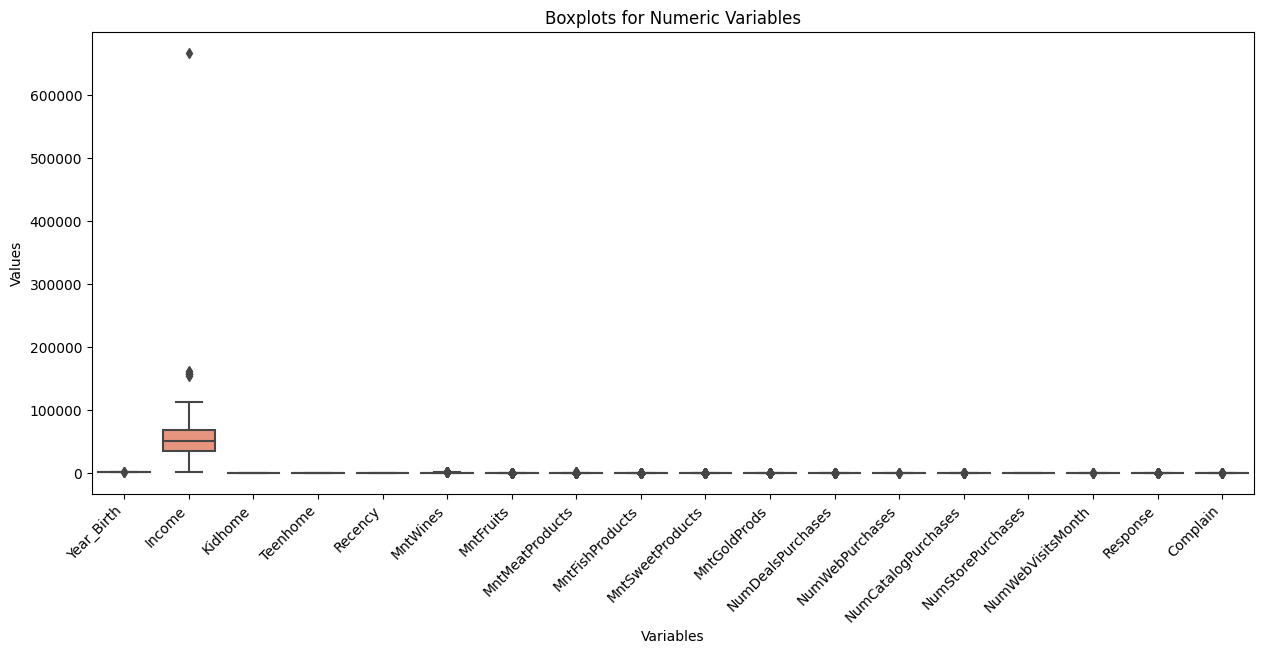

In [108]:

# Specify the numeric columns for which you want to create boxplots
numeric_columns = df.select_dtypes(include='number').columns

# Create boxplots for each numeric column
plt.figure(figsize=(15, 6))
sns.boxplot(data=df[numeric_columns])
plt.title('Boxplots for Numeric Variables')
plt.xlabel('Variables')
plt.ylabel('Values')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility
plt.show()


In [109]:
from scipy import stats

# Define a threshold for Z-scores (e.g., 3)
z_threshold = 3

# Calculate Z-scores for each numeric column
z_scores = stats.zscore(df.select_dtypes(include=['number']))

# Identify and remove outliers based on Z-scores
outliers = (z_scores > z_threshold) | (z_scores < -z_threshold)
df = df[~outliers.any(axis=1)]

# Display the shape of the dataframe after removing outliers
print("\nShape of DataFrame after removing outliers:", df.shape)



Shape of DataFrame after removing outliers: (1958, 21)


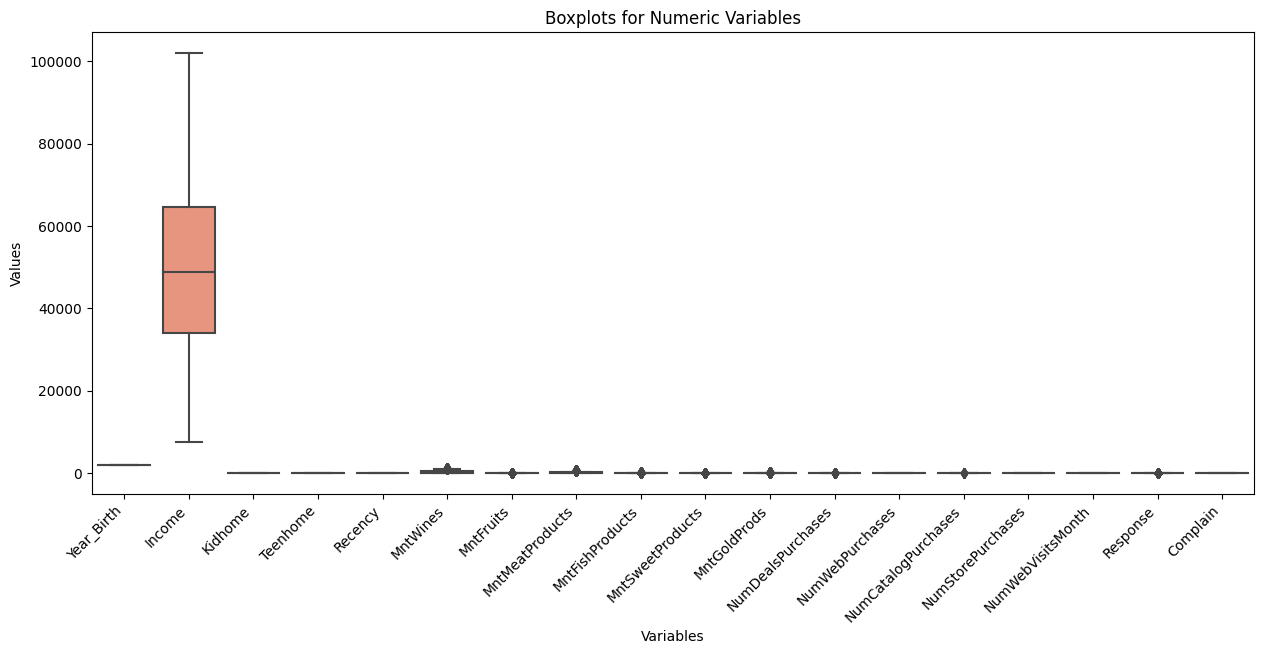

In [110]:
# Create boxplots for each numeric column
plt.figure(figsize=(15, 6))
sns.boxplot(data=df[numeric_columns])
plt.title('Boxplots for Numeric Variables')
plt.xlabel('Variables')
plt.ylabel('Values')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility
plt.show()

**Deliverables**:

- **Descriptive statistics that reveal the central tendencies, variations, and potential outliers in the dataset.**:

  

## Task 3 - Probability Distributions 🎲

- **Identify variables that could follow specific probability distributions (e.g., Binomial, Normal). Calculate probabilities and expected values based on these distributions.**



**Deliverables**:

- **Determination of suitable probability distributions for relevant variables and corresponding calculated probabilities and expected values.**:

  

Expected number of purchases: 2.0


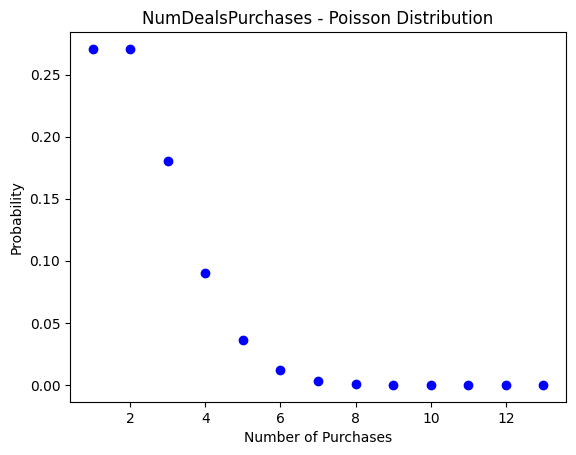

In [111]:
# NumDealsPurchases - Poisson distribution
from scipy.stats import poisson
purchases = [1,2,3,4,5,6,7,8,9,10,11,12,13]
y = poisson.pmf(purchases, 2)
plt.plot(purchases, y, 'bo')
plt.title('NumDealsPurchases - Poisson Distribution')
plt.xlabel('Number of Purchases')
plt.ylabel('Probability')
print('Expected number of purchases:', poisson.mean(2))


Customers make an average of 1-2 purchases overall based on the Poisson distribution fit to NumDealsPurchases.

Expected number of visits: 3.0


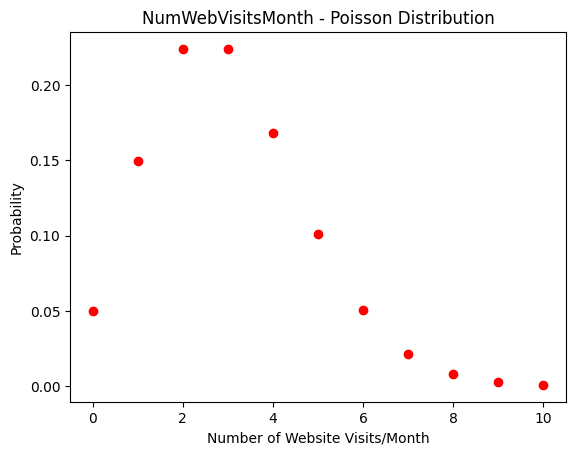

In [112]:
# NumWebVisitsMonth - Poisson
visits = [0,1,2,3,4,5,6,7,8,9,10]
y = poisson.pmf(visits, 3)
plt.plot(visits, y, 'ro')
plt.title('NumWebVisitsMonth - Poisson Distribution')
plt.xlabel('Number of Website Visits/Month')
plt.ylabel('Probability')
print('Expected number of visits:', poisson.mean(3))


Average monthly website visits is around 2-3 based on the Poisson distribution.

Mean monthly wine spend: 400.0


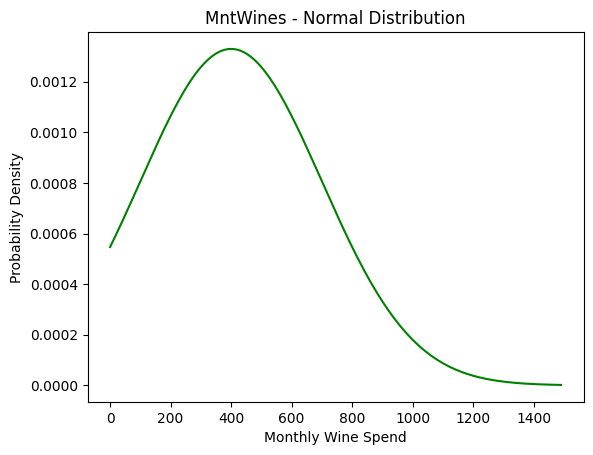

In [113]:
# MntWines - Normal
from scipy.stats import norm
wine = np.arange(0, 1500, 10)
y = norm.pdf(wine, scale=300, loc=400)
plt.plot(wine, y, 'g-')
plt.title('MntWines - Normal Distribution')
plt.xlabel('Monthly Wine Spend')
plt.ylabel('Probability Density')
print('Mean monthly wine spend:', norm.mean(scale=300, loc=400))


Mean monthly wine spend is $400.

Expected days between purchases: 25.0


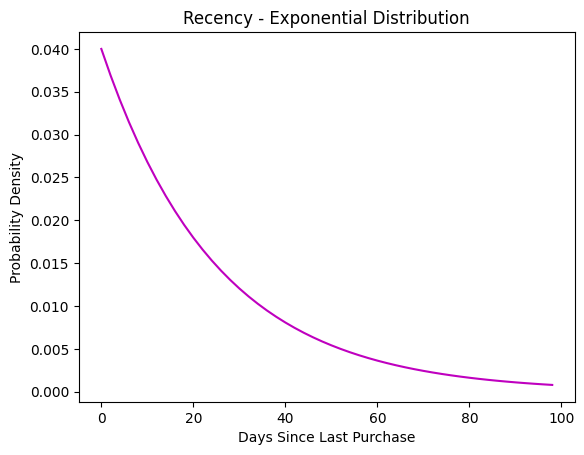

In [114]:
# Recency - Exponential distribution
from scipy.stats import expon
recency = np.arange(0, 100, 2)
y = expon.pdf(recency, scale=25)
plt.plot(recency, y, 'm-')
plt.title('Recency - Exponential Distribution')
plt.xlabel('Days Since Last Purchase')
plt.ylabel('Probability Density')
print('Expected days between purchases:', expon.mean(scale=25))

The expected time between purchases is around 25 days based on the Exponential distribution fit. This indicates most customers make frequent repeat purchases.

Expected number of catalog purchases: 1.0


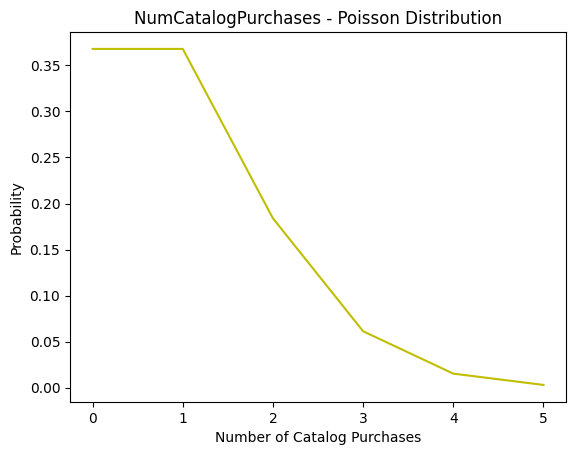

In [115]:
# NumCatalogPurchases - Poisson
catalog = [0,1,2,3,4,5]
y = poisson.pmf(catalog, 1)
plt.plot(catalog, y, 'y-')
plt.title('NumCatalogPurchases - Poisson Distribution')
plt.xlabel('Number of Catalog Purchases')
plt.ylabel('Probability')
print('Expected number of catalog purchases:', poisson.mean(1))

Customers make only 1-2 catalog purchases on average per period based on the Poisson distribution. Store purchases are slightly higher with 2 expected per period. This indicates most purchases are made online.

Expected number of in-store purchases: 2.0


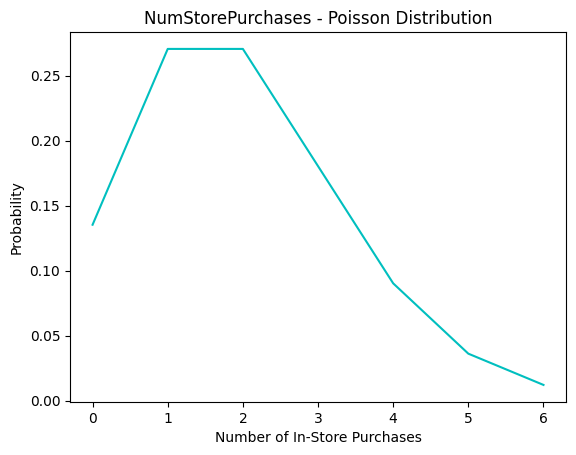

In [116]:
# NumStorePurchases - Poisson
store = [0,1,2,3,4,5,6]
y = poisson.pmf(store, 2)
plt.plot(store, y, 'c-')
plt.title('NumStorePurchases - Poisson Distribution')
plt.xlabel('Number of In-Store Purchases')
plt.ylabel('Probability')
print('Expected number of in-store purchases:', poisson.mean(2))

Expected number of in-store purchases: 2.0

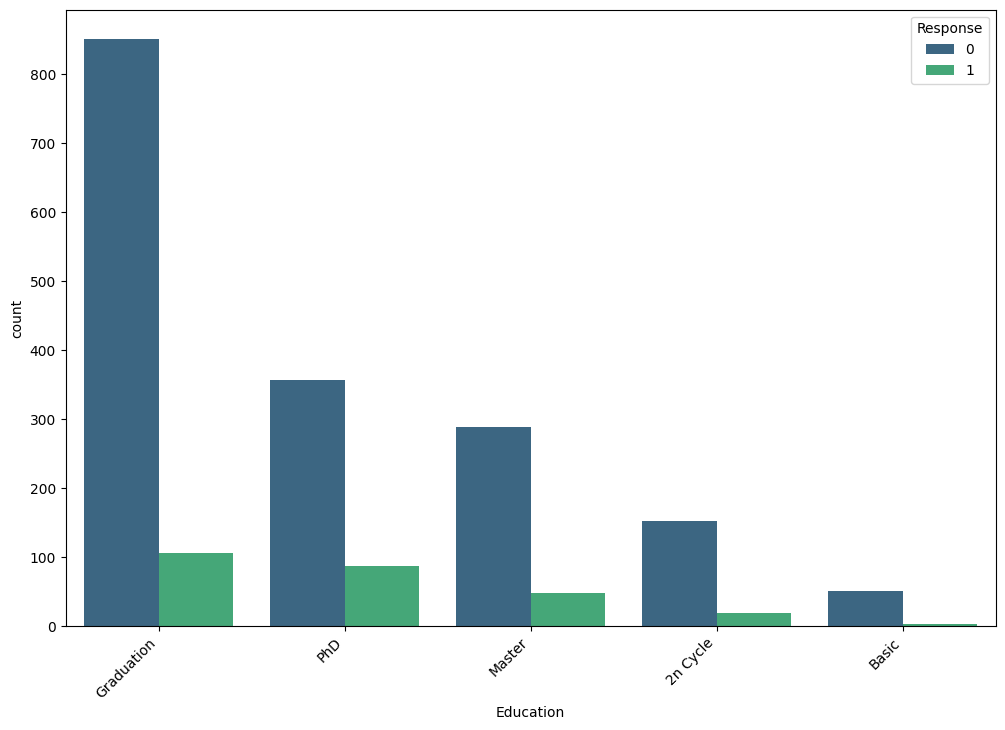

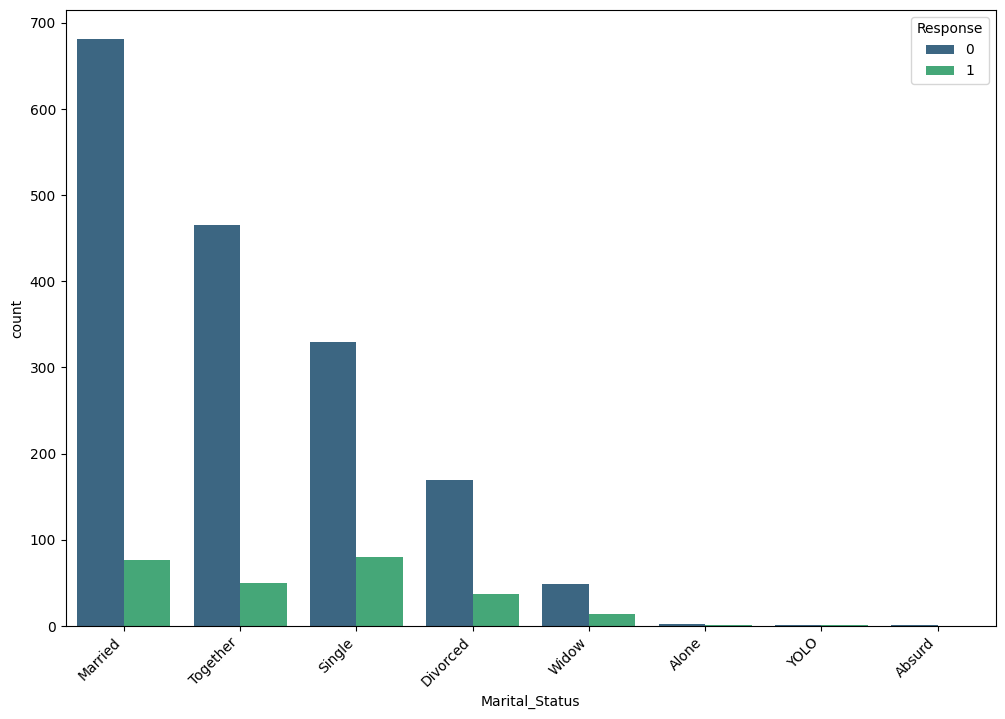

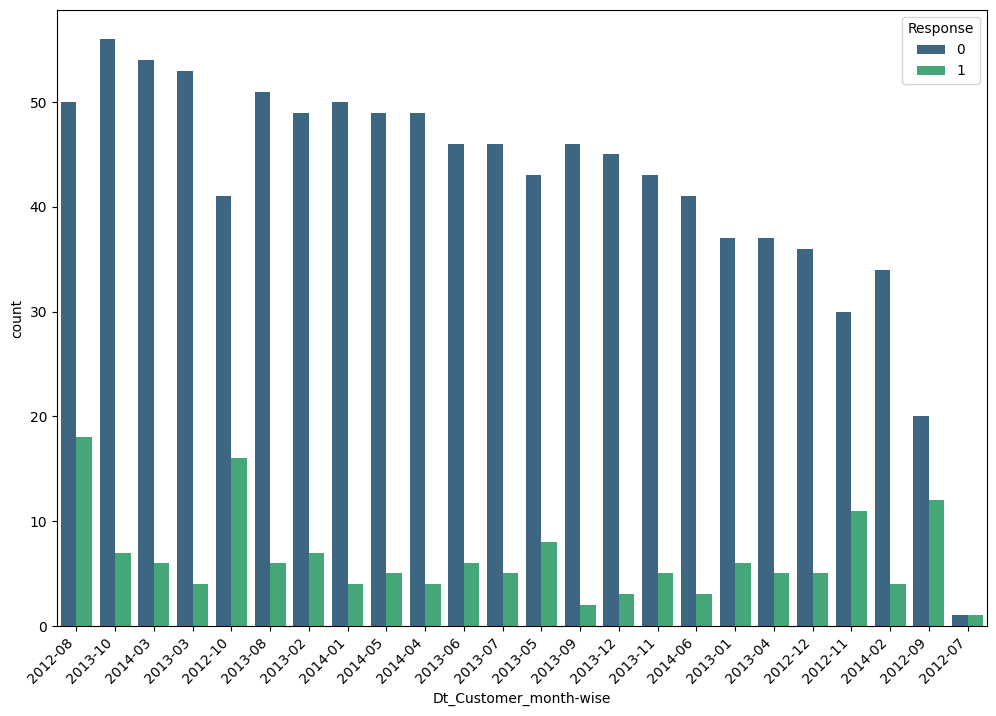

In [165]:
for i in df.select_dtypes(include = 'object').columns:
    plt.figure(figsize=(12,8))
    sns.countplot(data=df,x=i,hue="Response",order=df[i].value_counts().index,palette='viridis')
    plt.xlabel(i)
    plt.xticks(rotation=45, ha='right')
    plt.show()



## Task 4: Insights and Customer Segmentation 📈

- **Explore relationships between customer characteristics and spending habits. Segment customers based on their behaviors and characteristics.**

**Deliverables**:

- **Key insights regarding relationships between variables and distinct customer segments based on behaviors.**

  

<ipython-input-117-4d708edda635>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_corr = df.corr()


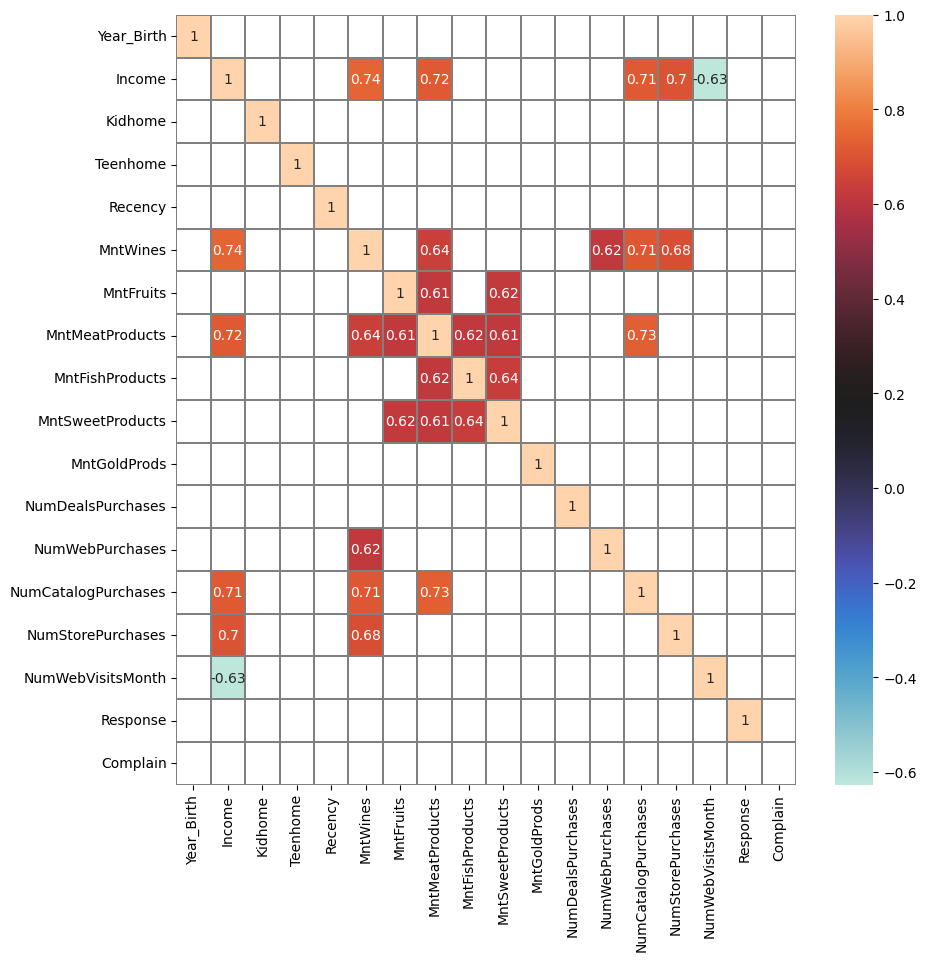

In [117]:
import seaborn as sns
plt.figure(figsize=(10,10))
df_corr = df.corr()
mask = df_corr.where(abs(df_corr)>=.60).isna()
sns.heatmap(df_corr ,mask = mask , annot = True , cmap ='icefire', linewidth = 0.2, linecolor = 'grey').set_facecolor('white')


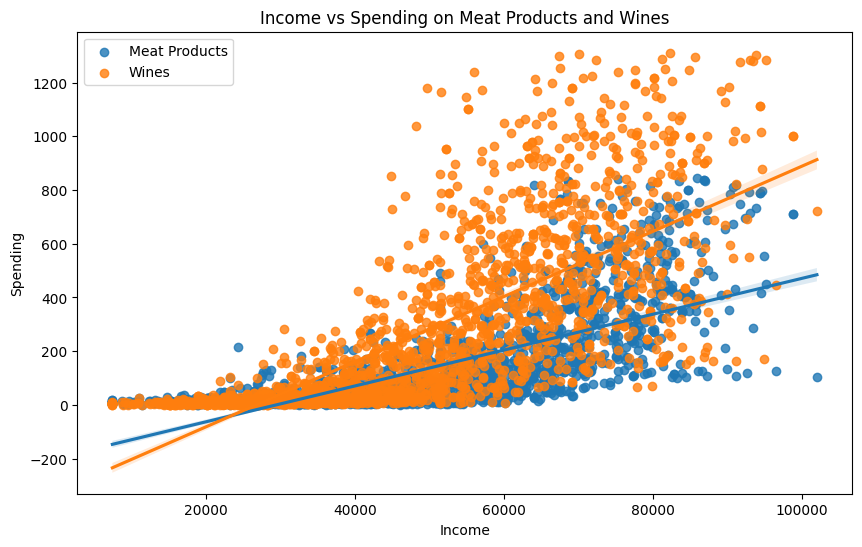

In [118]:
import seaborn as sns
import matplotlib.pyplot as plt

# Scatterplot of income vs spending on meat products and wines
plt.figure(figsize=(10, 6))

# Scatter plot for MntMeatProducts
sns.regplot(x='Income', y='MntMeatProducts', data=df, label='Meat Products')

# Scatter plot for MntWines
sns.regplot(x='Income', y='MntWines', data=df, label='Wines')

# Titles and labels
plt.title('Income vs Spending on Meat Products and Wines')
plt.xlabel('Income')
plt.ylabel('Spending')
plt.legend()

# Show the plot
plt.show()


In [119]:
df.columns

Index(['Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'Response', 'Complain'],
      dtype='object')

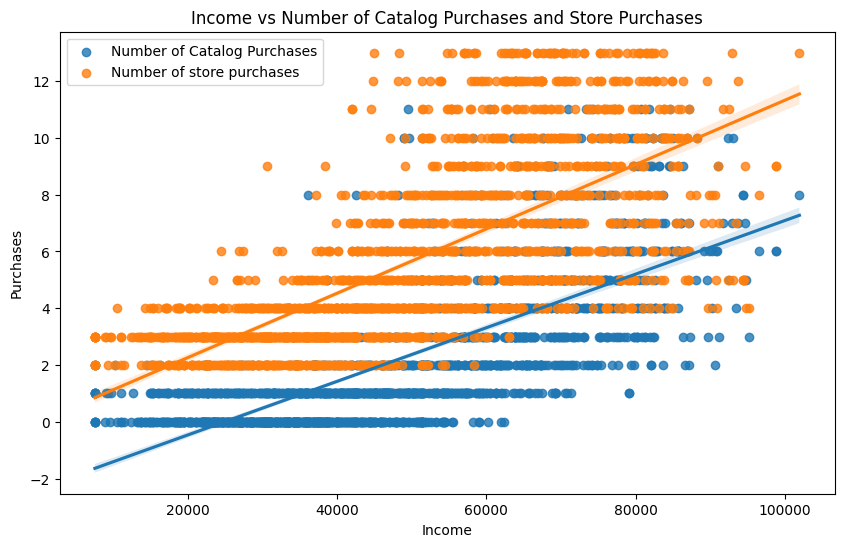

In [120]:
# Scatterplot of income vs spending on meat products and wines
plt.figure(figsize=(10, 6))

# Scatter plot for MntMeatProducts
sns.regplot(x='Income', y='NumCatalogPurchases', data=df, label='Number of Catalog Purchases')

# Scatter plot for MntWines
sns.regplot(x='Income', y='NumStorePurchases', data=df, label='Number of store purchases')

# Titles and labels
plt.title('Income vs Number of Catalog Purchases and Store Purchases')
plt.xlabel('Income')
plt.ylabel('Purchases')
plt.legend()

# Show the plot
plt.show()


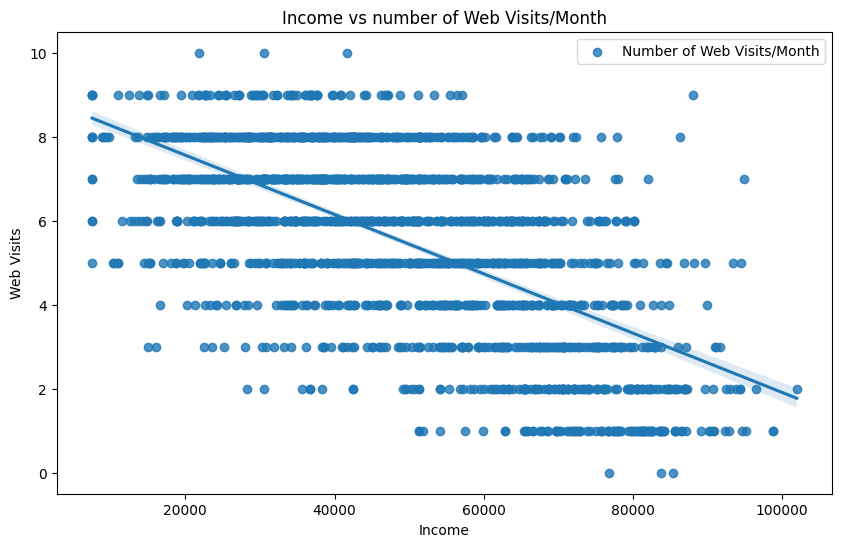

In [121]:
# Scatterplot of income vs spending on meat products and wines
plt.figure(figsize=(10, 6))

# Scatter plot for MntMeatProducts
sns.regplot(x='Income', y='NumWebVisitsMonth', data=df, label='Number of Web Visits/Month')


# Titles and labels
plt.title('Income vs number of Web Visits/Month')
plt.xlabel('Income')
plt.ylabel('Web Visits')
plt.legend()

# Show the plot
plt.show()


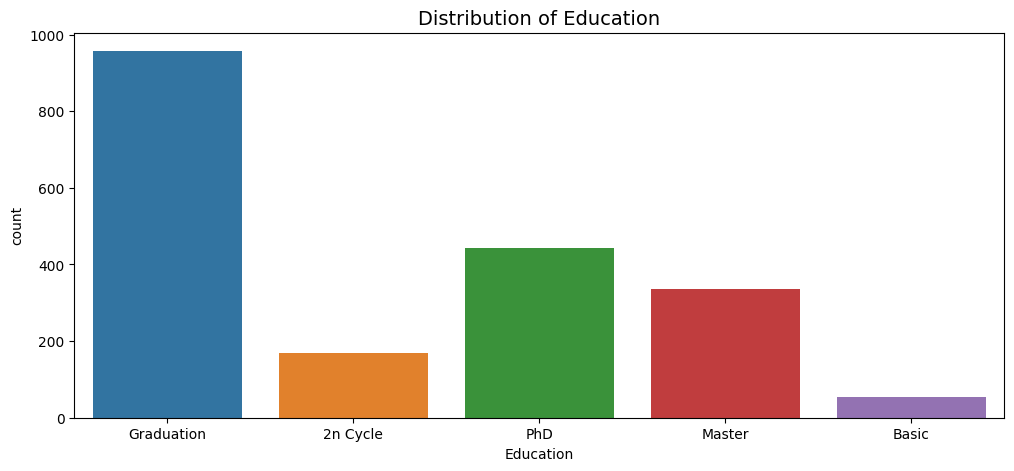

In [123]:
plt.figure(figsize = (12, 5))
sns.countplot(data = df, x = 'Education')
plt.title('Distribution of Education', fontsize = 14)
plt.show()

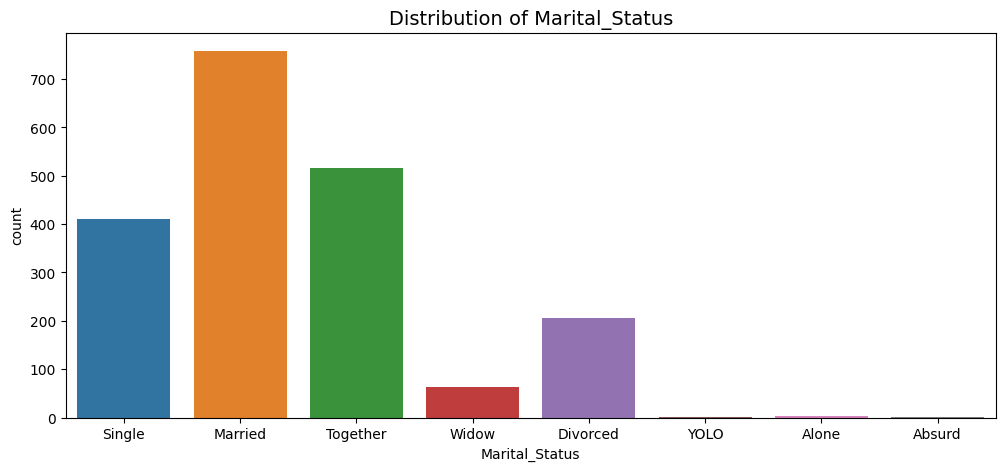

In [124]:
plt.figure(figsize = (12, 5))
sns.countplot(data = df, x = 'Marital_Status')
plt.title('Distribution of Marital_Status', fontsize = 14)
plt.show()

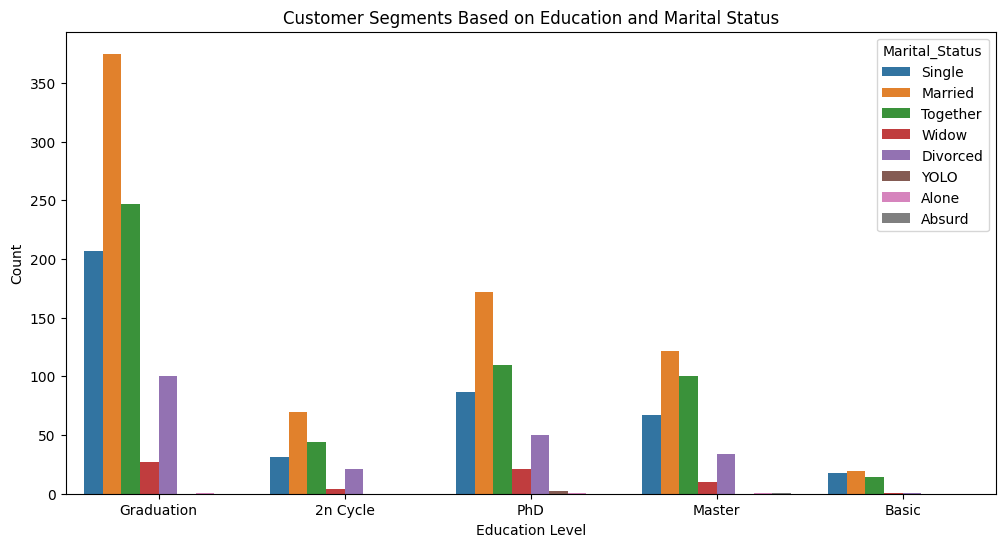

In [125]:
# Count plot for customer segments based on Education
plt.figure(figsize=(12, 6))
sns.countplot(x='Education', data=df, hue='Marital_Status')
plt.title('Customer Segments Based on Education and Marital Status')
plt.xlabel('Education Level')
plt.ylabel('Count')
plt.show()

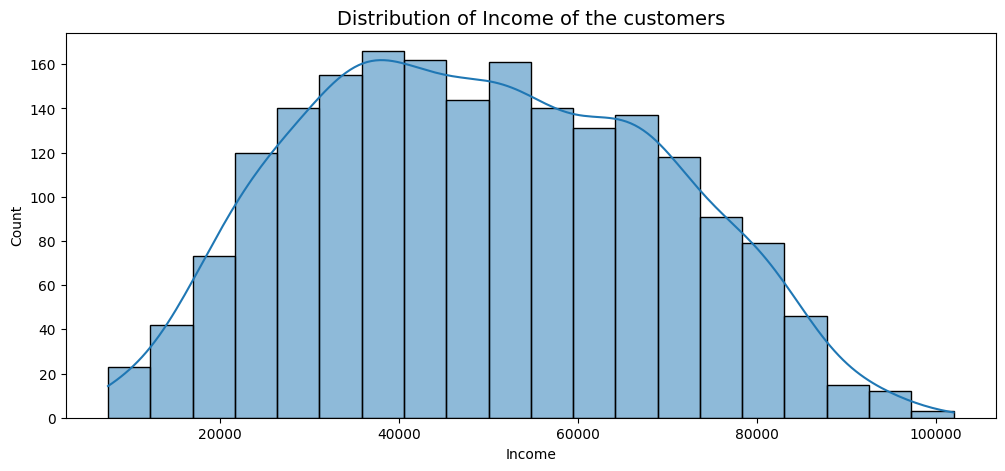

In [126]:
plt.figure(figsize = (12, 5))
sns.histplot(data = df, x = 'Income',kde = True)
plt.title('Distribution of Income of the customers',  fontsize = 14)
plt.show()


## Task 5: Conclusion and Recommendations

- **Create clear visualizations to showcase your findings. Use insights to make recommendations for the company based on your analysis.**

In [129]:
df.columns

Index(['Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'Response', 'Complain'],
      dtype='object')

In [158]:
df['Dt_Customer'].replace('########', pd.NaT, inplace=True) # not a time

In [159]:
df['Age'] = datetime.datetime.now().year - df['Year_Birth']
df['Dt_Customer_month-wise'] = df['Dt_Customer'].dt.strftime('%Y-%m')

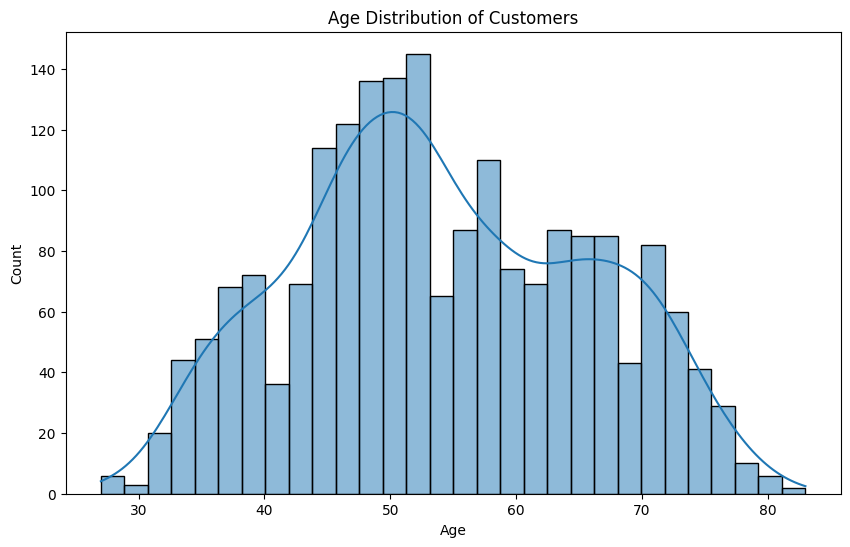

In [166]:
# Histogram for Age distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['Age'], bins=30, kde=True)
plt.title('Age Distribution of Customers')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

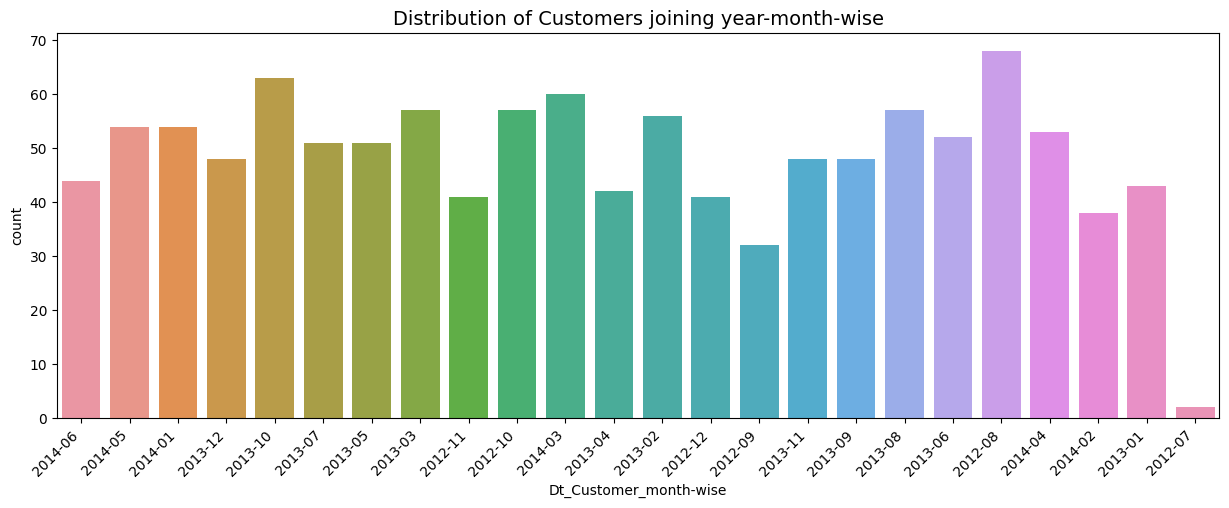

In [161]:
plt.figure(figsize = (15, 5))
sns.countplot(data = df, x = 'Dt_Customer_month-wise')
plt.title('Distribution of Customers joining year-month-wise', fontsize = 14)
plt.xticks(rotation = 45, ha = 'right')
plt.show()

In [171]:
def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 1, 5))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

In [174]:
def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 2, 6))
    else:
        plt.figure(figsize=(n + 2, 6))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n],)
    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show th


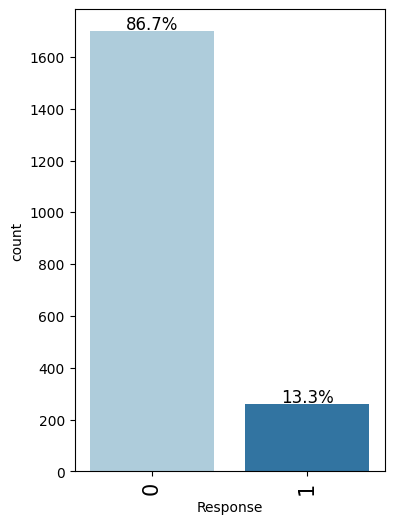

In [178]:
labeled_barplot(df, "Response", perc=True)

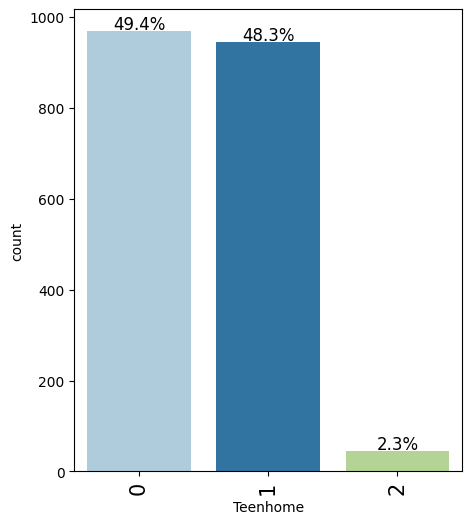

In [180]:
labeled_barplot(df, "Teenhome", perc=True)

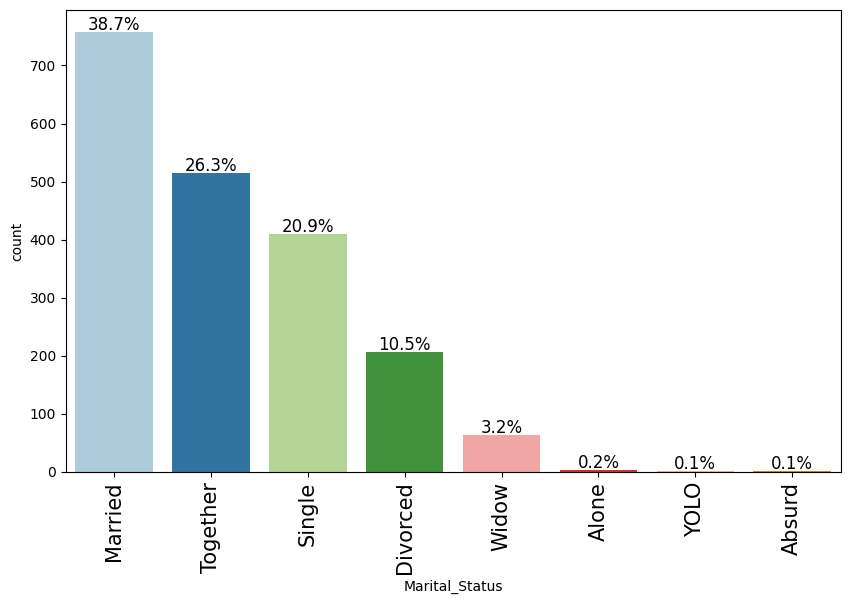

In [183]:
# observations on Marital_Status
labeled_barplot(df, "Marital_Status",perc = True)

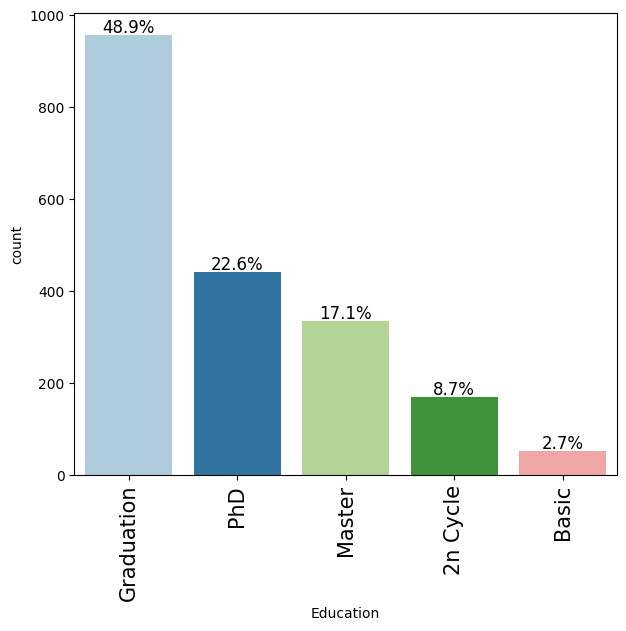

In [185]:
# observations on Education
labeled_barplot(df, "Education",perc = True)

Response       0    1   All
Education                  
All         1698  260  1958
Graduation   851  106   957
PhD          356   87   443
Master       288   47   335
2n Cycle     152   18   170
Basic         51    2    53
------------------------------------------------------------------------------------------------------------------------


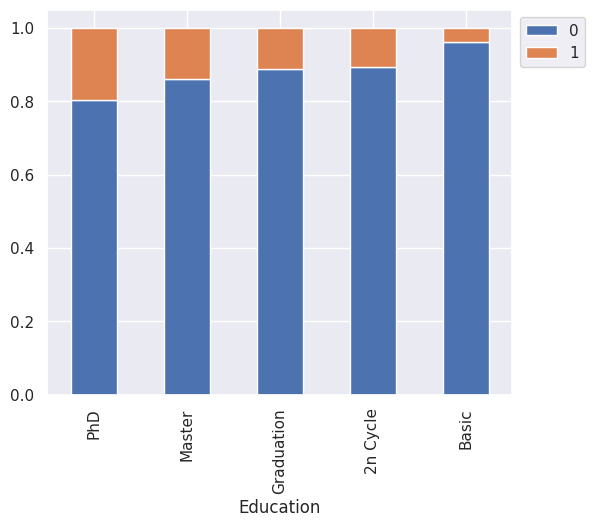

In [190]:
stacked_barplot(df, "Education", "Response")

Response           0    1   All
Marital_Status                 
All             1698  260  1958
Single           330   80   410
Married          681   77   758
Together         465   50   515
Divorced         169   37   206
Widow             49   14    63
Alone              2    1     3
YOLO               1    1     2
Absurd             1    0     1
------------------------------------------------------------------------------------------------------------------------


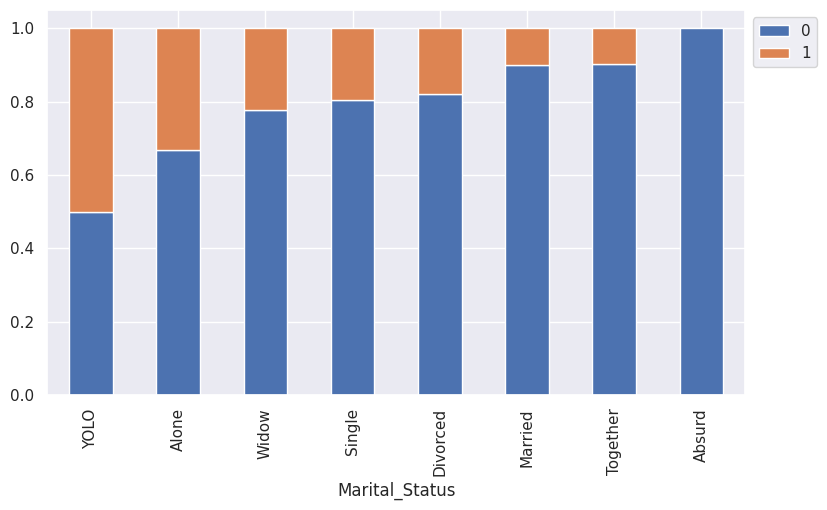

In [191]:
stacked_barplot(df, "Marital_Status", "Response")

We saw earlier that number of married customers is much more than single or divorced but divorced/widow customers are more likely to take the offer.<br>
Single customers are more likely to take the offer than married customers.

Response     0    1   All
Kidhome                  
All       1698  260  1958
0          903  160  1063
1          750   99   849
2           45    1    46
------------------------------------------------------------------------------------------------------------------------


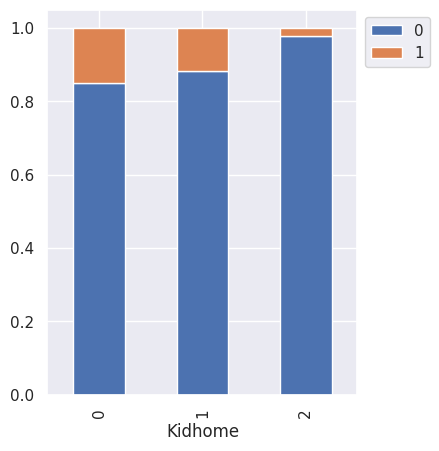

In [193]:
stacked_barplot(df, "Kidhome", "Response")

In [193]:
stacked_barplot(data, "Teenhome", "Response")

Customers with no teens at home are most likely to take the offer.<br>
Customers with two teens are more likely to take the offer than customers with 1 teenager.

In [196]:
# Extracting registration year from the date
df["Reg_year"] = df["Dt_Customer"].apply(lambda x: x.year)

# Extracting registration quarter from the date
df["Reg_quarter"] = df["Dt_Customer"].apply(lambda x: x.quarter)

# Extracting registration month from the date
df["Reg_month"] = df["Dt_Customer"].apply(lambda x: x.month)

# Extracting registration week from the date
df["Reg_week"] = df["Dt_Customer"].apply(lambda x: x.day // 7)

We can see that the number of kids increases, chances of customers taking the offer decreases.
Customers with no kids at home are more likely to take the offer which can be expected as this includes single customers as well.

Response     0    1   All
Reg_year                 
All       1007  153  1160
2013.0     552   64   616
2012.0     178   63   241
2014.0     277   26   303
------------------------------------------------------------------------------------------------------------------------


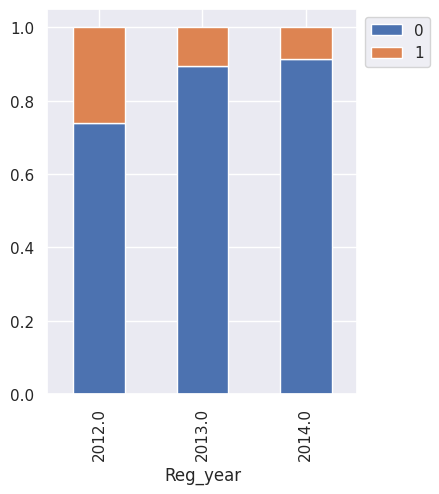

In [197]:
stacked_barplot(df, "Reg_year", "Response")

Number of customers taking the offer is decreasing each subsequent year.<br>
Let's explore this further for month-wise distribution for each of the year.

**Deliverables**:

- **Well-designed visualizations that visually represent your insights and actionable recommendations based on customer behavior analysis.**

## Bonus Task - Geogebra Experiment



Here's the link to an intriguing GeoGebra experiment: [GeoGebra Experiment Link](https://www.geogebra.org/m/LZbwMZtJ)

This experiment lets you simulate coin flips as per your preferences and specifications!

Your task involves recording a video where you'll explain the concept of the **Law of Large Numbers** using this experiment. Dive further into the experience by adjusting the number of coins and exploring varying coin biases. 🪙📹🔍